In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for i in data_files:
    data[i.replace('.csv','')] = pd.read_csv(i)

In [2]:
print(data['sat_results'].head(5))

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [3]:
for i in data:
    print(data[i].head(5))

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

In [4]:
all_survey = pd.read_csv("survey_all.txt",delimiter="\t",encoding="windows-1252")

d75_survey = pd.read_csv("survey_d75.txt",delimiter="\t",encoding="windows-1252")

survey = pd.concat([all_survey,d75_survey],axis=0)

print(survey.head(5))


     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0   

In [5]:
survey['DBN'] = survey['dbn']
list_column = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,list_column]
data["survey"] = survey

In [6]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def fillpad(x) :
    return str(x["CSD"]).zfill(2)

data["class_size"]["padded_csd"] = data["class_size"].apply(fillpad, axis=1)

data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

print(data["class_size"]["DBN"].head(3))

0    01M015
1    01M015
2    01M015
Name: DBN, dtype: object


In [7]:
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"],errors="coerce")
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"],errors="coerce")
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"],errors="coerce")

data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]

print(data["sat_results"]["sat_score"].head(5))

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


In [8]:
import re

def getlat(x):
    latlon = str(re.findall("\(.+\)",x["Location 1"]))
    return latlon.split(",")[0].replace("['(","")

data["hs_directory"]["lat"] = data["hs_directory"].apply(getlat,axis=1)

print(data["hs_directory"].head(2))

      dbn                          school_name   borough building_code  \
0  17K548  Brooklyn School for Music & Theatre  Brooklyn          K440   
1  09X543     High School for Violin and Dance     Bronx          X400   

   phone_number    fax_number  grade_span_min  grade_span_max  \
0  718-230-6250  718-230-6262             9.0              12   
1  718-842-0687  718-589-9849             9.0              12   

   expgrade_span_min  expgrade_span_max        ...         priority10  \
0                NaN                NaN        ...                NaN   
1                NaN                NaN        ...                NaN   

                                          Location 1 Community Board  \
0  883 Classon Avenue\r\nBrooklyn, NY 11225\r\n(4...             9.0   
1  1110 Boston Road\r\nBronx, NY 10456\r\n(40.827...             3.0   

  Council District Census Tract        BIN           BBL  \
0             35.0        213.0  3029686.0  3.011870e+09   
1             16.0      

In [9]:
import re

def getlon(x):
    latlon = str(re.findall("\(.+\)",x["Location 1"]))
    return latlon.split(",")[1].replace(")']","")

data["hs_directory"]["lon"] = data["hs_directory"].apply(getlon,axis=1)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"],errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"],errors="coerce")

print(data["hs_directory"].head(3))

      dbn                                  school_name   borough  \
0  17K548          Brooklyn School for Music & Theatre  Brooklyn   
1  09X543             High School for Violin and Dance     Bronx   
2  09X327  Comprehensive Model School Project M.S. 327     Bronx   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          K440  718-230-6250  718-230-6262             9.0              12   
1          X400  718-842-0687  718-589-9849             9.0              12   
2          X240  718-294-8111  718-294-8109             6.0              12   

   expgrade_span_min  expgrade_span_max    ...      \
0                NaN                NaN    ...       
1                NaN                NaN    ...       
2                NaN                NaN    ...       

                                          Location 1 Community Board  \
0  883 Classon Avenue\r\nBrooklyn, NY 11225\r\n(4...             9.0   
1  1110 Boston Road\r\nBronx, NY 10456\r\n(40.827

In [10]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

print(class_size.head(5))

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [11]:
import numpy as np
csgrouped = class_size.groupby("DBN")
class_size = csgrouped.agg(np.mean)

class_size.reset_index(inplace=True)

data["class_size"] = class_size

print(data["class_size"].head(4))



      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000                4.00   
1  01M332    1                            46.0000                2.00   
2  01M378    1                            33.0000                1.00   
3  01M448    1                           105.6875                4.75   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  


In [12]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

print(data["demographics"].head(4))

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  \
6         NaN         89.4               189   13   31     35     28   
13        NaN         61.5               328   32   46     52     54   
20        NaN         92.5               626   52  102    121     87   
27        NaN         99.7               401   14   34     38     36   

      ...     black_num black_per hispanic_num hispanic_per white_num  \
6     ...            63      33.3          109         57.7         4   
13    ...            81      24.7          158         48.2        28   
20    ...            55       8.8      

In [13]:
data["graduation"] = data["graduation"][(data["graduation"]["Cohort"] == "2006") & (data["graduation"]["Demographic"] == "Total Cohort")]

print(data["graduation"].head(4))

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   

   Total Regents - % of cohort Total Regents - % of grads  \
3                        46.2%                      83.7%   
10                       33.9%                      79.2%   
17         74.400000000000006%               

In [14]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

data["ap_2010"][cols] = data["ap_2010"][cols].apply(pd.to_numeric,errors="coerce")

data["ap_2010"][cols].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

In [15]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"],how="left",on="DBN")

combined = combined.merge(data["graduation"],how="left",on="DBN")

print(combined.head(3))

combined.shape

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   

                     SchoolName  AP Test Takers   Total Exams Taken  \
0                           NaN              NaN                NaN   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2        EAST SIDE COMMUNITY HS             19.0        

(479, 33)

In [16]:
combined = combined.merge(data["class_size"],how="inner",on="DBN")
combined = combined.merge(data["demographics"],how="inner",on="DBN")
combined = combined.merge(data["survey"],how="inner",on="DBN")
combined = combined.merge(data["hs_directory"],how="inner",on="DBN")

print(combined.head(3))

combined.shape

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   

                     SchoolName  AP Test Takers   Total Exams Taken  \
0                           NaN              NaN                NaN   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2        EAST SIDE COMMUNITY HS             19.0        

(363, 165)

In [17]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

print(combined.head(6))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
5  01M696                     BARD HIGH SCHOOL EARLY COLLEGE   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   
5                    130                            624.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1

In [18]:
def get_first_two_chars(x):
    return x[0:2]

combined["school_dist"] = combined['DBN'].apply(get_first_two_chars)
combined["school_dist"].head(3)

0    01
1    01
2    01
Name: school_dist, dtype: object

In [22]:
correlations = combined.corr(method="pearson")["sat_score"]
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

In [25]:
pd.options.display.max_rows = 999
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

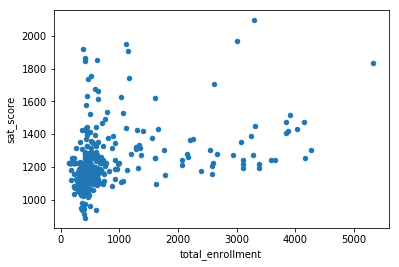

In [31]:
import matplotlib.pyplot as plt
combined.plot(x="total_enrollment", y="sat_score", kind="scatter")


In [35]:
low_enrollment=combined[(combined["total_enrollment"] < 1000) & (combined["sat_score"] < 1000)]
print(low_enrollment)

        DBN                                       SCHOOL NAME  \
91   07X334               INTERNATIONAL COMMUNITY HIGH SCHOOL   
125  09X365               ACADEMY FOR LANGUAGE AND TECHNOLOGY   
126  09X403                   BRONX INTERNATIONAL HIGH SCHOOL   
139  10X268             KINGSBRIDGE INTERNATIONAL HIGH SCHOOL   
141  10X342             INTERNATIONAL SCHOOL FOR LIBERAL ARTS   
176  12X388  PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE   
179  12X550                     HIGH SCHOOL OF WORLD CULTURES   
188  13K439                BROOKLYN INTERNATIONAL HIGH SCHOOL   
225  17K524     INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
237  18K563                        IT TAKES A VILLAGE ACADEMY   
253  19K583                         MULTICULTURAL HIGH SCHOOL   
286  24Q296            PAN AMERICAN INTERNATIONAL HIGH SCHOOL   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
91                      34                            310.0   
125                     54  

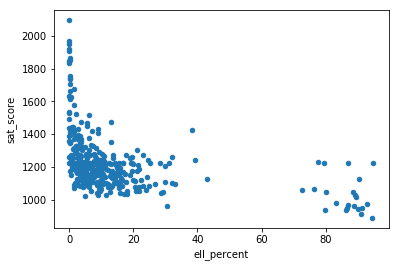

In [36]:
combined.plot(x="ell_percent",y="sat_score",kind="scatter")